In [70]:
import pandas as pd
test  = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/test.csv")  
train = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/train.csv")

In [71]:
train.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [72]:
train.Activity.value_counts()


WALKING               209
STANDING              179
LAYING                164
WALKING_UPSTAIRS      159
WALKING_DOWNSTAIRS    145
SITTING               143
Name: Activity, dtype: int64

In [73]:
train.shape,test.shape


((999, 563), (999, 563))

In [74]:
test.Activity.value_counts()


WALKING               185
LAYING                183
STANDING              178
SITTING               170
WALKING_UPSTAIRS      149
WALKING_DOWNSTAIRS    134
Name: Activity, dtype: int64

In [75]:
# suffling data 
from sklearn.utils import shuffle

test  = shuffle(test)
train = shuffle(train)


In [76]:
# separating data inputs and output lables 
trainData  = train.drop('Activity' , axis=1).values
trainLabel = train.Activity.values

testData  = test.drop('Activity' , axis=1).values
testLabel = test.Activity.values
# encoding labels 
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

# encoding test labels 
encoder.fit(testLabel)
testLabelE = encoder.transform(testLabel)

# encoding train labels 
encoder.fit(trainLabel)
trainLabelE = encoder.transform(trainLabel)

In [77]:
# target variable is categorical
# IV's are num
# classification models:
# Decision tree
# SVM
# NN
# RF
# GBM
# DNN
# ANN
# DNN

In [78]:
# applying supervised neural network using multi-layer preceptron 
import sklearn.neural_network as nn 
mlpSGD  =  nn.MLPClassifier(hidden_layer_sizes=(90,)  \
                        , max_iter=1000 , alpha=1e-4  \
                        , solver='sgd' , verbose=10   \
                        , tol=1e-19 , random_state=1  \
                        , learning_rate_init=.001)
mlpADAM =  nn.MLPClassifier(hidden_layer_sizes=(90,)  \
                        , max_iter=1000 , alpha=1e-4  \
                        , solver='adam' , verbose=10  \
                        , tol=1e-19 , random_state=1  \
                        , learning_rate_init=.001) 
mlpLBFGS =  nn.MLPClassifier(hidden_layer_sizes=(90,)  \
                        , max_iter=1000 , alpha=1e-4  \
                        , solver='lbfgs' , verbose=10  \
                        , tol=1e-19 , random_state=1  \
                        , learning_rate_init=.001) 

In [79]:
nnModelSGD  = mlpSGD.fit(trainData , trainLabelE)


Iteration 1, loss = 2.15827835
Iteration 2, loss = 1.88162390
Iteration 3, loss = 1.67043827
Iteration 4, loss = 1.51387361
Iteration 5, loss = 1.37439436
Iteration 6, loss = 1.27941797
Iteration 7, loss = 1.20874444
Iteration 8, loss = 1.14536238
Iteration 9, loss = 1.09032714
Iteration 10, loss = 1.04124780
Iteration 11, loss = 0.99798273
Iteration 12, loss = 0.96008589
Iteration 13, loss = 0.92580793
Iteration 14, loss = 0.89469683
Iteration 15, loss = 0.86578527
Iteration 16, loss = 0.83963455
Iteration 17, loss = 0.81426643
Iteration 18, loss = 0.79125509
Iteration 19, loss = 0.76944580
Iteration 20, loss = 0.74935346
Iteration 21, loss = 0.73219375
Iteration 22, loss = 0.71179306
Iteration 23, loss = 0.69456799
Iteration 24, loss = 0.67852751
Iteration 25, loss = 0.66280924
Iteration 26, loss = 0.64768009
Iteration 27, loss = 0.63430829
Iteration 28, loss = 0.62000243
Iteration 29, loss = 0.60714120
Iteration 30, loss = 0.59469680
Iteration 31, loss = 0.58250642
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [81]:
nnModelSGD  = mlpSGD.fit(trainData , trainLabelE)


Iteration 1, loss = 2.15827835
Iteration 2, loss = 1.88162390
Iteration 3, loss = 1.67043827
Iteration 4, loss = 1.51387361
Iteration 5, loss = 1.37439436
Iteration 6, loss = 1.27941797
Iteration 7, loss = 1.20874444
Iteration 8, loss = 1.14536238
Iteration 9, loss = 1.09032714
Iteration 10, loss = 1.04124780
Iteration 11, loss = 0.99798273
Iteration 12, loss = 0.96008589
Iteration 13, loss = 0.92580793
Iteration 14, loss = 0.89469683
Iteration 15, loss = 0.86578527
Iteration 16, loss = 0.83963455
Iteration 17, loss = 0.81426643
Iteration 18, loss = 0.79125509
Iteration 19, loss = 0.76944580
Iteration 20, loss = 0.74935346
Iteration 21, loss = 0.73219375
Iteration 22, loss = 0.71179306
Iteration 23, loss = 0.69456799
Iteration 24, loss = 0.67852751
Iteration 25, loss = 0.66280924
Iteration 26, loss = 0.64768009
Iteration 27, loss = 0.63430829
Iteration 28, loss = 0.62000243
Iteration 29, loss = 0.60714120
Iteration 30, loss = 0.59469680
Iteration 31, loss = 0.58250642
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [80]:
nnModelSGD  = mlpLBFGS.fit(trainData , trainLabelE)
nnModelSGD

MLPClassifier(hidden_layer_sizes=(90,), max_iter=1000, random_state=1,
              solver='lbfgs', tol=1e-19, verbose=10)

In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
# load data
#https://s3.amazonaws.com/hackerday.datascience/112/test.csv
#https://s3.amazonaws.com/hackerday.datascience/112/train.csv

train = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/train.csv")
test = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/test.csv")
print('Train Data', train.shape,'\n', train.columns)
print('\nTest Data', test.shape)

Train Data (999, 563) 
 Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

Test Data (999, 563)


In [83]:
print('Train labels', train['Activity'].unique(), '\nTest Labels', test['Activity'].unique())


Train labels ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS'] 
Test Labels ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [84]:
pd.crosstab(train.subject, train.Activity)


Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,0,0,9,0,0,0


In [85]:
sub15 = train.loc[train['subject']==1]
sub15.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [86]:
train.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [87]:
train.subject.value_counts()


1    347
3    341
5    302
6      9
Name: subject, dtype: int64

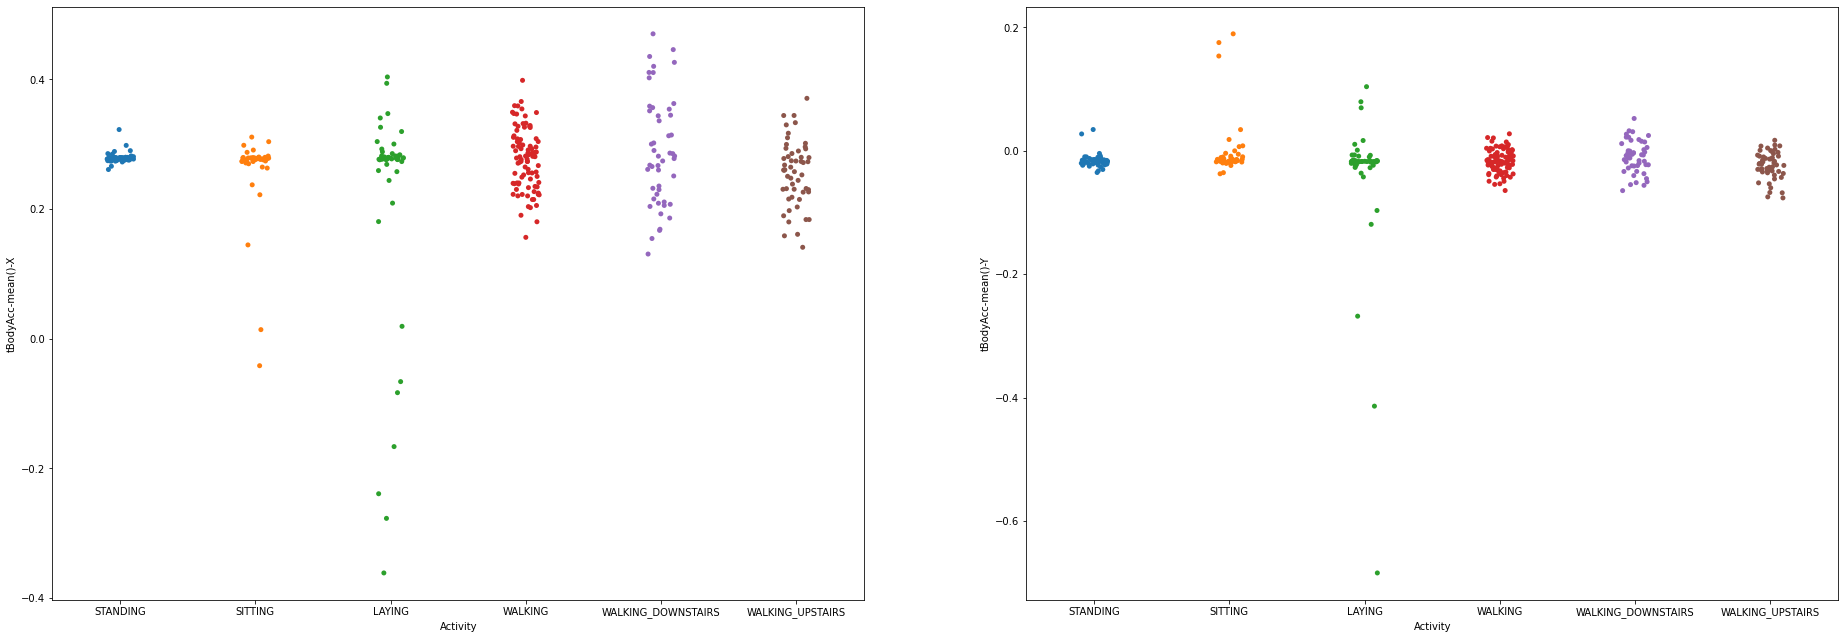

In [88]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sb.stripplot(x='Activity', y=sub15.iloc[:,0], data=sub15, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sb.stripplot(x='Activity', y=sub15.iloc[:,1], data=sub15, jitter=True)
plt.show()

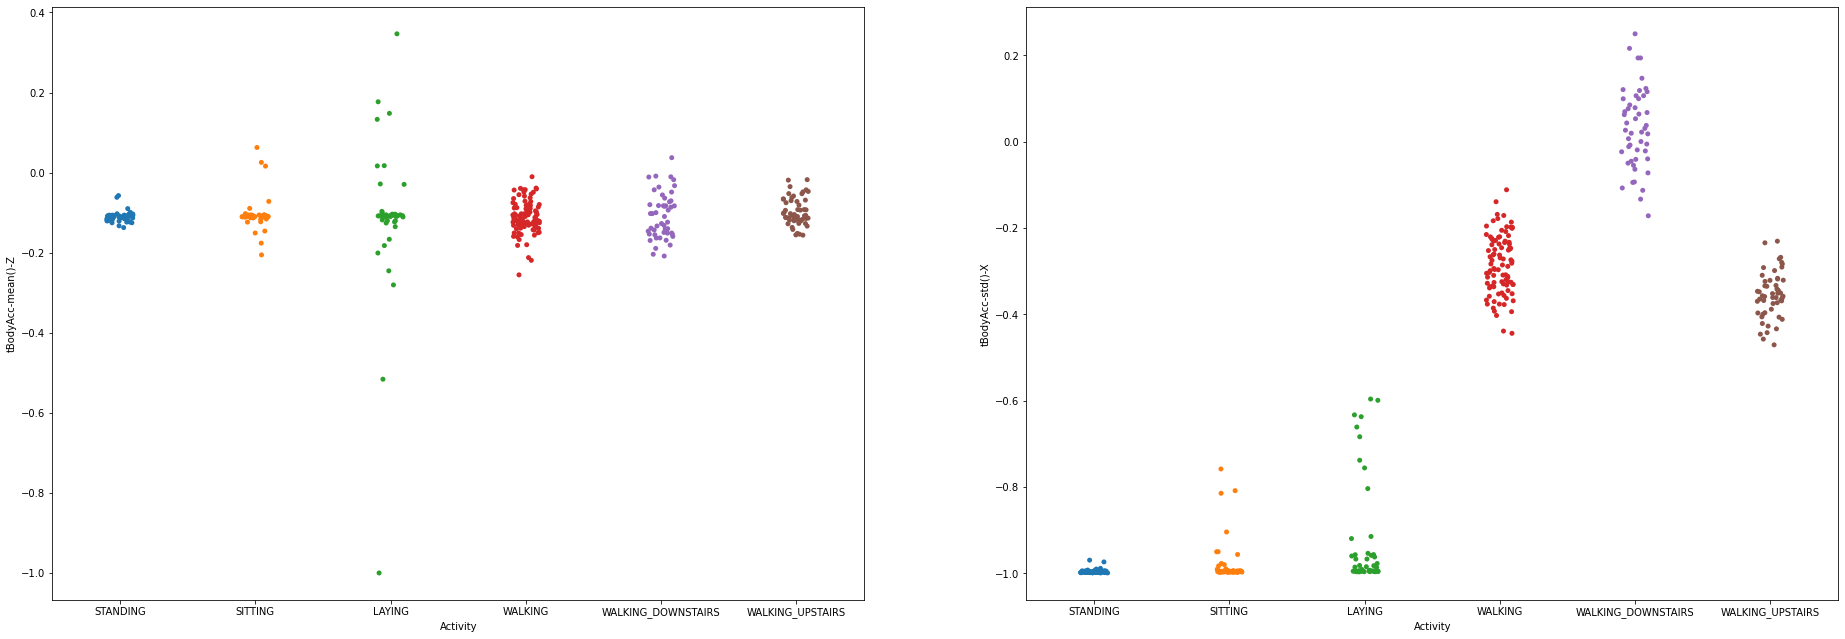

In [89]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sb.stripplot(x='Activity', y=sub15.iloc[:,2], data=sub15, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sb.stripplot(x='Activity', y=sub15.iloc[:,3], data=sub15, jitter=True)
plt.show()

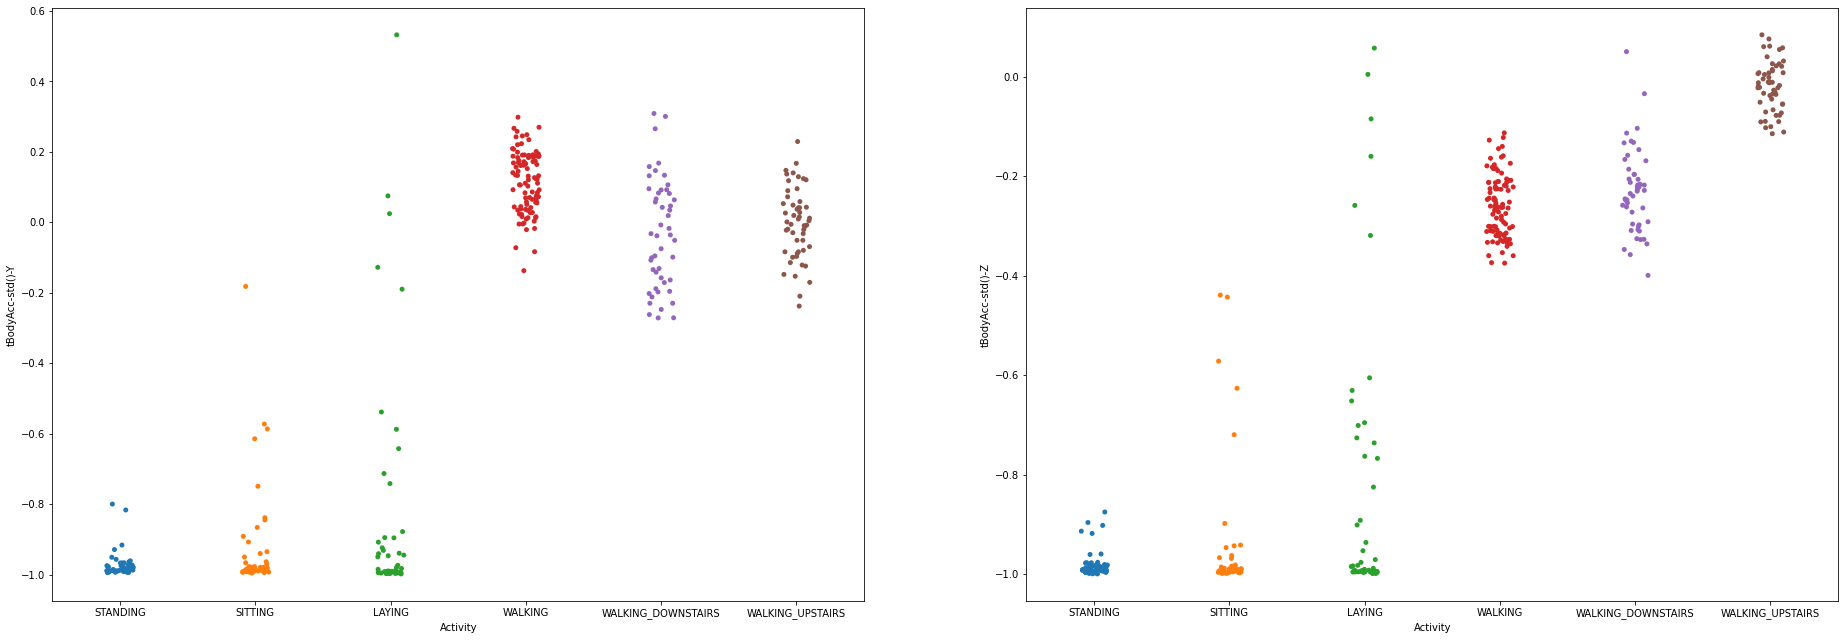

In [90]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sb.stripplot(x='Activity', y=sub15.iloc[:,4], data=sub15, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sb.stripplot(x='Activity', y=sub15.iloc[:,5], data=sub15, jitter=True)
plt.show()

In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#https://s3.amazonaws.com/hackerday.datascience/112/test.csv
#https://s3.amazonaws.com/hackerday.datascience/112/train.csv
train_df = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/train.csv")
test_df = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/test.csv")
train_df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [92]:
unique_activities = train_df.Activity.unique()
print("NUmber of unique activities: {}".format(len(unique_activities)))
replacer = {}
for i, activity in enumerate(unique_activities):
    replacer[activity] = i
train_df.Activity = train_df.Activity.replace(replacer)
test_df.Activity = test_df.Activity.replace(replacer)
train_df.head(10)

NUmber of unique activities: 6


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,0
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,0
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,0
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,0
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,0
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,0


In [93]:
train_df = train_df.drop("subject", axis=1)
test_df = test_df.drop("subject", axis=1)
def get_all_data():
    train_values = train_df.values
    test_values = test_df.values
    np.random.shuffle(train_values)
    np.random.shuffle(test_values)
    X_train = train_values[:, :-1]
    X_test = test_values[:, :-1]
    y_train = train_values[:, -1]
    y_test = test_values[:, -1]
    return X_train, X_test, y_train, y_test
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = get_all_data()
model = LogisticRegression(C=10)#complexity parameter
model

LogisticRegression(C=10)

In [94]:
model = LogisticRegression()
model

LogisticRegression()

In [95]:
model.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
model.score(X_test, y_test)


0.8888888888888888

In [97]:
# Try some transformations
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = get_all_data() #generating the training set
pca = PCA(n_components=200) # initializing the PCA
pca.fit(X_train) #applying PCA
X_train = pca.transform(X_train) # transforming the dataset
X_test = pca.transform(X_test)

model.fit(X_train, y_train) #creating model
model.score(X_test, y_test) #score

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8858858858858859

In [98]:
# Scale features to be between -1 and 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, X_test, y_train, y_test = get_all_data()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8898898898898899

In [99]:
# Neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
X_train, X_test, y_train, y_test = get_all_data()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
n_input = X_train.shape[1] # number of features
n_output = 6 # number of possible labels
n_samples = X_train.shape[0] # number of training samples
n_hidden_units = 40
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print(Y_train.shape)
print(Y_test.shape)

(999, 6)
(999, 6)


In [100]:
def create_model():
    model = Sequential()
    model.add(Dense(n_hidden_units,
                    input_dim=n_input,
                    activation="relu"))
    model.add(Dense(n_hidden_units,
                    input_dim=n_input,
                    activation="relu"))
    model.add(Dense(n_output, activation="softmax"))
    # Compile model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    return model
estimator = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, verbose=False)
estimator.fit(X_train, Y_train)
print("Score: {}".format(estimator.score(X_test, Y_test)))

<ipython-input-100-6623e09110b8>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, verbose=False)


Score: 0.9099099040031433


In [101]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = get_all_data()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9079079079079079